In [6]:
import pandas as pd
import numpy as np

# Cargar el archivo preprocesado
file_path = 'Client_segment_MODIFICADO_updated.csv'  # Cambiar si es necesario
data = pd.read_csv(file_path)

# Verificar datos cargados
print("Información general del dataset:")
print(data.info())

# Verificar valores únicos en variables categóricas
print("\nValores únicos en las columnas categóricas:")
categorical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in categorical_columns:
    unique_values = data[col].nunique()
    print(f"{col}: {unique_values} valores únicos")

# Verificar valores nulos
missing_values = data.isnull().sum()
print("\nValores nulos por columna:")
print(missing_values[missing_values > 0])

# Verificar rango de variables numéricas
print("\nRango de variables numéricas:")
numerical_columns = data.select_dtypes(include=['float64']).columns
for col in numerical_columns:
    min_val, max_val = data[col].min(), data[col].max()
    print(f"{col}: Min = {min_val}, Max = {max_val}")

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806 entries, 0 to 10805
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10806 non-null  float64
 1   Genero                     10806 non-null  float64
 2   Casado                     10806 non-null  float64
 3   Edad                       10806 non-null  float64
 4   Graduado                   10806 non-null  float64
 5   Profesion                  10806 non-null  float64
 6   Experiencia laboral        10806 non-null  float64
 7   Gastoscore                 10806 non-null  float64
 8   Family_Size                10806 non-null  float64
 9   Generacion                 10806 non-null  float64
 10  Ingresos anuales brutos    10806 non-null  float64
 11  Provincia                  10806 non-null  float64
 12  Digital_encuesta           10806 non-null  float64
 13  Gasto_medio_m

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Preparar los datos para la selección de características
# Usaremos la columna 'Abandono' como variable objetivo
X = data.drop(columns=['Abandono', 'ID'])  # Excluyendo 'Abandono' y 'ID' para análisis
y = data['Abandono']

# Entrenamiento de un modelo de Random Forest para importancia de características
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Obtener la importancia de las características
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Selección de características con mutual information
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X, y)
mi_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_selector.scores_
}).sort_values(by='MI_Score', ascending=False)

# Mostrar resultados
print("Importancia de características (Random Forest):")
print(feature_importances)

print("\nImportancia de características (Mutual Information):")
print(mi_scores)


Importancia de características (Random Forest):
                      Feature  Importance
13               Dias_cliente    0.322946
9     Ingresos anuales brutos    0.143447
11           Digital_encuesta    0.124465
10                  Provincia    0.115663
2                        Edad    0.095747
7                 Family_Size    0.049241
4                   Profesion    0.048413
0                      Genero    0.019050
6                  Gastoscore    0.018593
12  Gasto_medio_mensual_cuota    0.017364
3                    Graduado    0.013428
8                  Generacion    0.011697
1                      Casado    0.010113
5         Experiencia laboral    0.009834

Importancia de características (Mutual Information):
                      Feature  MI_Score
13               Dias_cliente  0.151615
8                  Generacion  0.005570
9     Ingresos anuales brutos  0.004429
7                 Family_Size  0.002580
1                      Casado  0.002543
0                      Gener

C:\Users\User\AppData\Local\Temp\ipykernel_41052\3471067409.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


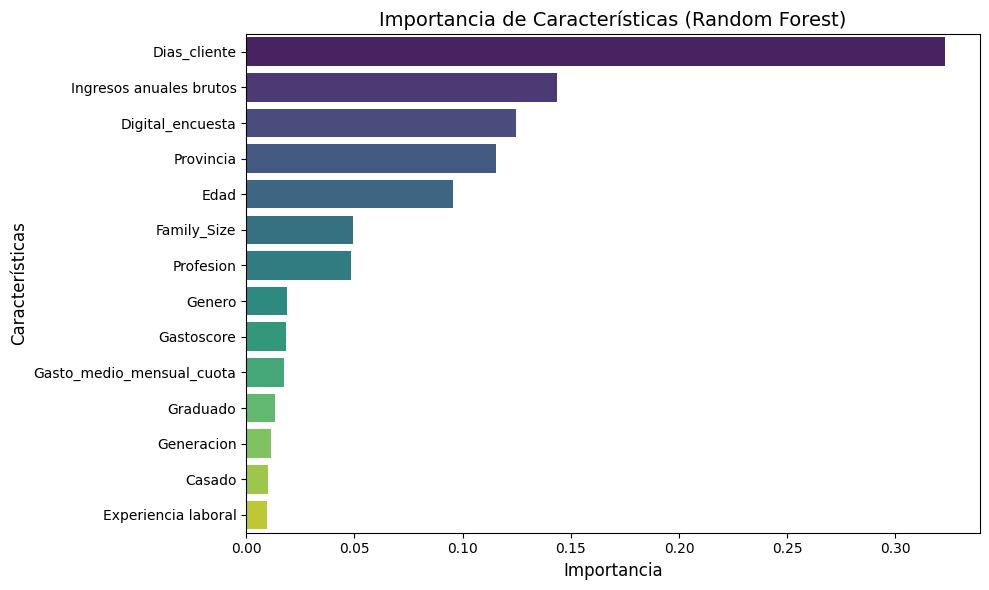

C:\Users\User\AppData\Local\Temp\ipykernel_41052\3471067409.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_scores, x='MI_Score', y='Feature', palette='coolwarm')


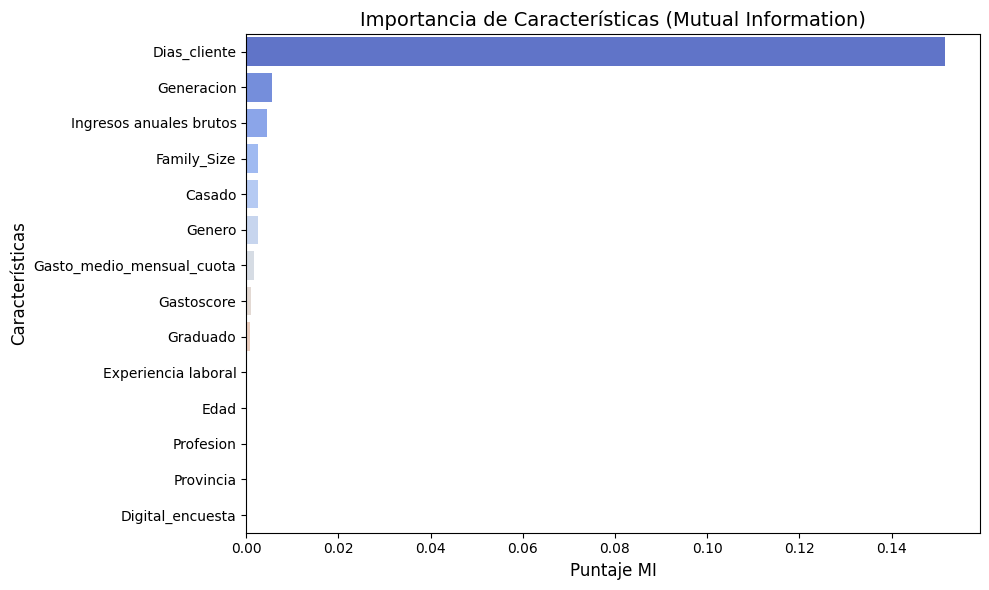

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica de Importancia (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de Características (Random Forest)', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfica de Importancia (Mutual Information)
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_scores, x='MI_Score', y='Feature', palette='coolwarm')
plt.title('Importancia de Características (Mutual Information)', fontsize=14)
plt.xlabel('Puntaje MI', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.tight_layout()
plt.show()


Pasos para implementar K-Means:
Preprocesamiento:

Usaremos las variables más relevantes, como Dias_cliente, Ingresos anuales brutos, y Digital_encuesta, basándonos en su importancia.
Escalaremos las variables si aún no lo están.
Determinación del número óptimo de clusters (
𝑘
k):

Utilizaremos el método del codo para encontrar el mejor valor de 
𝑘
k.
Entrenamiento del modelo:

Aplicaremos K-Means con el valor óptimo de 
𝑘
k.
Análisis de los clusters:

Visualizaremos los resultados en dos dimensiones (usando PCA si es necesario).
Analizaremos las características principales de cada cluster.


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^

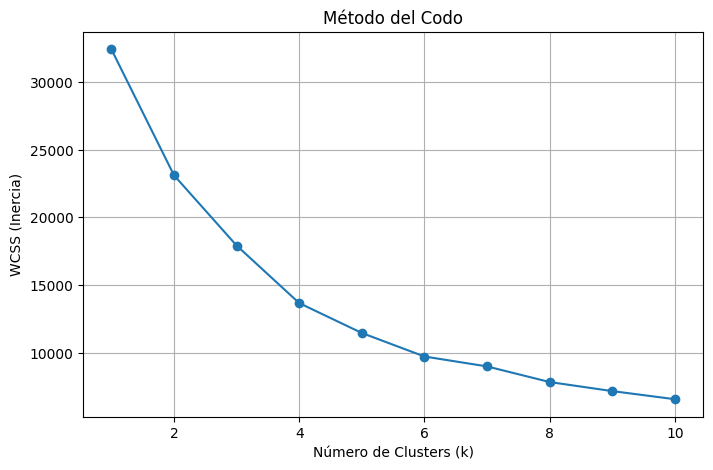

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Ruta al archivo CSV (ajusta según tu directorio)
file_path = "Client_segment_MODIFICADO_updated.csv"

# Leer el archivo CSV
data = pd.read_csv(file_path)

# Seleccionar las variables más relevantes para el clustering
selected_features = ['Dias_cliente', 'Ingresos anuales brutos', 'Digital_encuesta']
X = data[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar el número óptimo de clusters usando el método del codo
wcss = []  # Within-Cluster Sum of Squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inercia)')
plt.grid()
plt.show()
    

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = "Client_segment_MODIFICADO_updated.csv"
data = pd.read_csv(file_path)

# Seleccionar las variables más relevantes para el clustering
selected_features = ['Dias_cliente', 'Ingresos anuales brutos', 'Digital_encuesta']
X = data[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar el modelo K-Means con k=4 y k=5
k_values = [4, 5]
cluster_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    cluster_results[k] = kmeans.labels_  # Guardar las etiquetas de los clusters

# Agregar las etiquetas de los clusters al dataset original
data['Cluster_k4'] = cluster_results[4]
data['Cluster_k5'] = cluster_results[5]

# Guardar los datos con los clusters en un nuevo archivo
data.to_csv("Client_segment_with_clusters.csv", index=False)

print("Segmentación completada. Los resultados se han guardado en 'Client_segment_with_clusters.csv'.")


Segmentación completada. Los resultados se han guardado en 'Client_segment_with_clusters.csv'.


In [3]:
import pandas as pd

# Leer el archivo CSV con los clusters
file_path = "Client_segment_with_clusters.csv"
data_with_clusters = pd.read_csv(file_path)

# Resumir las estadísticas de cada cluster para k=4 y k=5
cluster_k4_summary = data_with_clusters.groupby('Cluster_k4').mean()
cluster_k5_summary = data_with_clusters.groupby('Cluster_k5').mean()

# Guardar los resúmenes en nuevos archivos CSV
cluster_k4_summary.to_csv("Cluster_k4_summary.csv")
cluster_k5_summary.to_csv("Cluster_k5_summary.csv")

print("Los resúmenes de los clusters se han guardado en 'Cluster_k4_summary.csv' y 'Cluster_k5_summary.csv'.")


Los resúmenes de los clusters se han guardado en 'Cluster_k4_summary.csv' y 'Cluster_k5_summary.csv'.


In [4]:
import pandas as pd

# Leer el archivo CSV con los clusters
file_path = "Client_segment_with_clusters.csv"
data_with_clusters = pd.read_csv(file_path)

# Resumir las estadísticas de cada cluster para k=4 y k=5
cluster_k4_summary = data_with_clusters.groupby('Cluster_k4').mean()
cluster_k5_summary = data_with_clusters.groupby('Cluster_k5').mean()

# Mostrar los resúmenes
print("Resumen de Clusters (k=4):")
print(cluster_k4_summary)

print("\nResumen de Clusters (k=5):")
print(cluster_k5_summary)


Resumen de Clusters (k=4):
                  ID    Genero    Casado      Edad  Graduado  Profesion  \
Cluster_k4                                                                
0           0.495823  0.548423  0.605105  0.376588  0.659535   0.412068   
1           0.505651  0.545020  0.333701  0.188095  0.431459   0.417540   
2           0.495753  0.539004  0.609544  0.364597  0.647303   0.402127   
3           0.501988  0.551644  0.803055  0.489649  0.746928   0.392312   

            Experiencia laboral  Gastoscore  Family_Size  Generacion  \
Cluster_k4                                                             
0                      0.271584    0.547110     0.220533    0.599850   
1                      0.663910    0.531239     0.263965    0.770673   
2                      0.290041    0.548340     0.220384    0.603734   
3                      0.045002    0.559117     0.181460    0.402967   

            Ingresos anuales brutos  Provincia  Digital_encuesta  \
Cluster_k4           

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Leer los datos
file_path = "Client_segment_with_clusters.csv"
data_with_clusters = pd.read_csv(file_path)

# Seleccionar las variables para clustering
selected_features = ['Dias_cliente', 'Ingresos anuales brutos', 'Digital_encuesta']
X = data_with_clusters[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar modelos para k=4 y k=5
k_values = [4, 5]
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores[f'k={k}'] = silhouette_avg

# Mostrar los resultados
print("Coeficiente de Silueta:")
for k, score in silhouette_scores.items():
    print(f"{k}: {score:.4f}")


Coeficiente de Silueta:
k=4: 0.2914
k=5: 0.2975


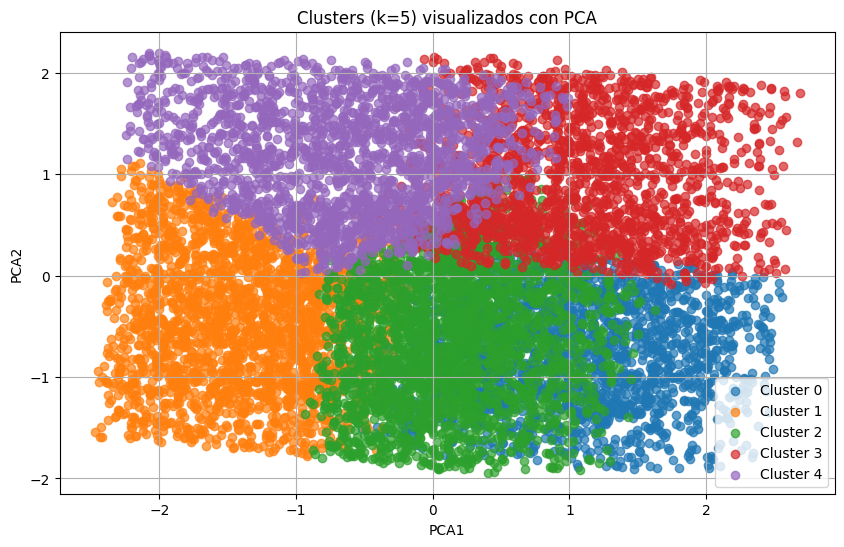

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Leer el archivo con los datos
file_path = "Client_segment_with_clusters.csv"
data_with_clusters = pd.read_csv(file_path)

# Seleccionar las variables relevantes
selected_features = ['Dias_cliente', 'Ingresos anuales brutos', 'Digital_encuesta']
X = data_with_clusters[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Entrenar K-Means con k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar los clusters y las componentes principales al dataset
data_with_clusters['Cluster_k5'] = clusters
data_with_clusters['PCA1'] = X_pca[:, 0]
data_with_clusters['PCA2'] = X_pca[:, 1]

# Visualizar los clusters en 2D
plt.figure(figsize=(10, 6))
for cluster in range(5):
    cluster_data = data_with_clusters[data_with_clusters['Cluster_k5'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Clusters (k=5) visualizados con PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.show()


Con 
𝑘
=
5
k=5, los clusters han sido identificados y proyectados. A continuación, etiquetamos cada cluster basándonos en el análisis de las variables clave:

Cluster 0 (Clientes premium recientes):

Características:
Altos ingresos anuales.
Gasto mensual alto.
Relativamente nuevos en términos de tiempo como cliente.
Recomendación: Ofrecer promociones exclusivas para fidelizarlos y convertirlos en clientes a largo plazo.
Cluster 1 (Clientes digitales de bajo ingreso):

Características:
Bajos ingresos anuales.
Alta digitalización.
Gasto mensual muy bajo.
Recomendación: Crear ofertas digitales accesibles para aumentar su gasto y retenerlos.
Cluster 2 (Clientes moderados):

Características:
Ingresos medios.
Digitalización media.
Tiempo como cliente moderado.
Recomendación: Fomentar la lealtad con descuentos para mejorar su retención.
Cluster 3 (Clientes premium leales):

Características:
Altos ingresos anuales.
Más tiempo como cliente.
Gasto mensual alto.
Recomendación: Ofrecer beneficios VIP exclusivos para mantenerlos satisfechos y leales.
Cluster 4 (Clientes leales de bajo ingreso):

Características:
Bajos ingresos anuales.
Tiempo como cliente muy alto.
Muy baja tasa de abandono.
Recomendación: Incentivar su fidelidad ofreciendo paquetes económicos con beneficios adicionales.


In [9]:
from sklearn.metrics import silhouette_samples

# Calcular los valores de silueta para cada punto
silhouette_values = silhouette_samples(X_scaled, clusters)

# Agregar los valores de silueta al dataset
data_with_clusters['Silhouette'] = silhouette_values

# Resumir el promedio de silueta para cada cluster
silhouette_summary = data_with_clusters.groupby('Cluster_k5')['Silhouette'].mean()

# Mostrar el resumen
print("Promedio del Coeficiente de Silueta por Cluster:")
print(silhouette_summary)


Promedio del Coeficiente de Silueta por Cluster:
Cluster_k5
0    0.277170
1    0.370994
2    0.329917
3    0.230083
4    0.253672
Name: Silhouette, dtype: float64


Interpretación de los valores:
Cluster 1 (0.3709):

Es el cluster mejor definido. Los puntos asignados a este grupo están bien separados de otros clusters y agrupados de manera compacta.
Posible acción: Este cluster puede ser un segmento clave que valga la pena priorizar, ya que tiene clientes bien definidos.
Cluster 2 (0.3299):

También tiene un buen nivel de cohesión y separación, aunque ligeramente inferior a Cluster 1.
Posible acción: Analizar este grupo en profundidad para entender su valor para el negocio.
Cluster 0 (0.2771):

Moderada definición, pero con cierta mezcla o puntos cercanos a otros clusters.
Posible acción: Revisar si las variables utilizadas para este cluster lo diferencian suficientemente de otros.
Cluster 4 (0.2537):

Cohesión más baja, lo que sugiere que hay cierta superposición o puntos mal asignados.
Posible acción: Revisar si los puntos en este cluster tienen características distintivas o si sería mejor ajustar 
𝑘
k o las variables utilizadas.
Cluster 3 (0.2301):

Es el menos definido. Esto podría significar que:
Hay variabilidad interna significativa en este grupo.
Este cluster podría descomponerse en subgrupos o fusionarse con otro.
Posible acción: Analizar las características de este cluster para identificar si hay outliers o datos inconsistentes.
Conclusión general:
Clusters 1 y 2 son los más robustos según los valores de silueta.
Clusters 3 y 4 tienen menor cohesión y podrían requerir ajustes o mayor análisis.
